In [68]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split 
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import OneHotEncoder, StandardScaler 
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt
warnings.filterwarnings("ignore")

In [69]:
data = pd.read_csv("nhlstats.csv")
data1 = data.drop(columns=["Unnamed: 0"])
print("Shape of the data is: {}".format(data.shape))
data.head()

Shape of the data is: (7857, 26)


,Unnamed: 0,Season,Age,Team_ID,Pos,GP,G,A,PTS,PIM,PS,PlusMinus,esG,ppG,shG,GWG,esA,ppA,shA,S,TOI,BLK,HIT,FOW,FOL,S_Pct
0,0,2015,27,DET,LW,71.0,23,21,44,72.0,5.6,3.0,15.0,8.0,0.0,5.0,15.0,6.0,0.0,154.0,1272.0,28.0,153.0,7.0,8.0,14.935065
1,1,2015,27,EDM,C,3.0,0,0,0,5.0,-0.1,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,32.0,3.0,3.0,4.0,4.0,0.000000
2,2,2015,24,CBJ,C,3.0,0,0,0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,0.0,2.0,0.0,0.0,NaN
3,3,2015,37,PIT,RW,70.0,1,6,7,44.0,-0.3,-1.0,1.0,0.0,0.0,1.0,5.0,0.0,1.0,51.0,682.0,29.0,183.0,17.0,23.0,1.960784
4,4,2015,24,COL,LW,1.0,0,1,1,0.0,0.1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,10.0,0.0,1.0,0.0,2.0,0.000000


In [70]:
data.isna().sum()

Unnamed: 0      0
Season          0
Age             0
Team_ID         0
Pos             0
GP              0
G               0
A               0
PTS             0
PIM             0
PS              0
PlusMinus       0
esG             0
ppG             0
shG             0
GWG             0
esA             0
ppA             0
shA             0
S               0
TOI             0
BLK             0
HIT             0
FOW             0
FOL             0
S_Pct         208
dtype: int64

In [71]:
X = data.drop(columns=["Unnamed: 0","PTS","G","A",'esG', 'ppG', 'shG',
       'GWG', 'esA', 'ppA', 'shA',])
y = data["PTS"]

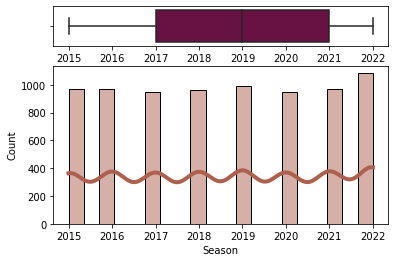

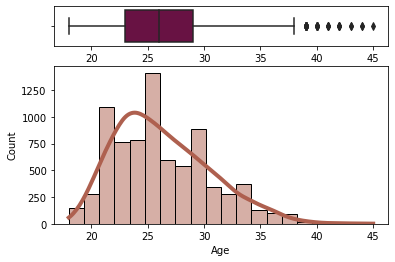

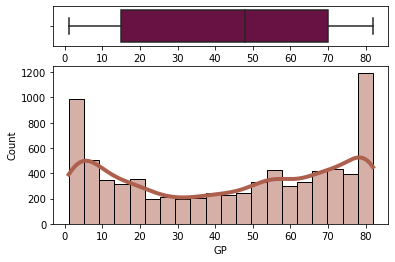

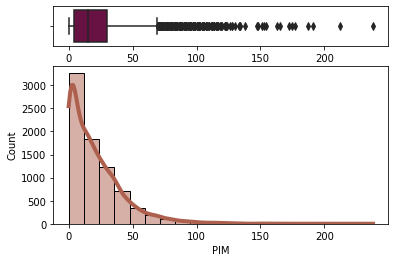

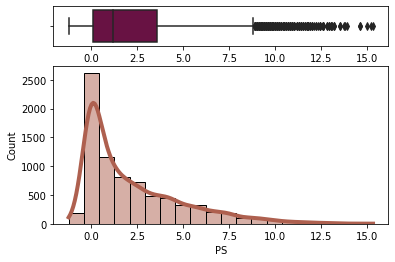

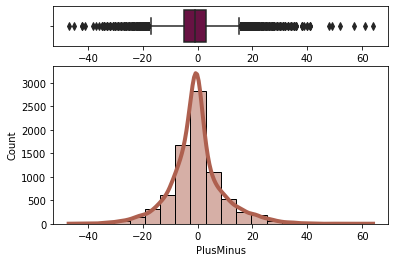

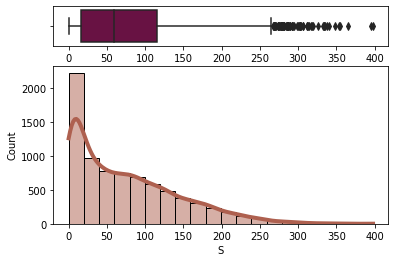

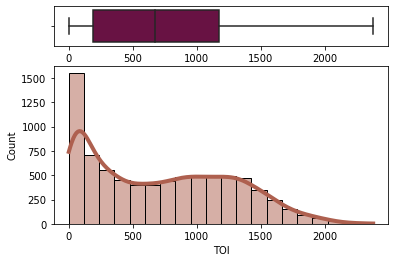

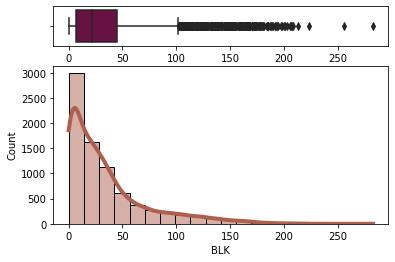

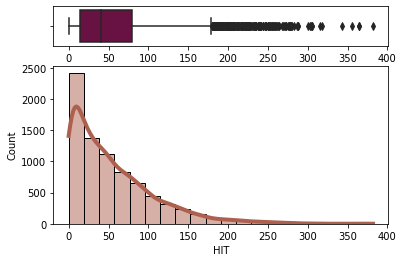

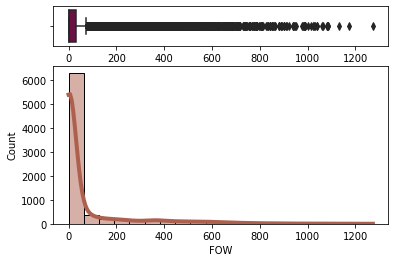

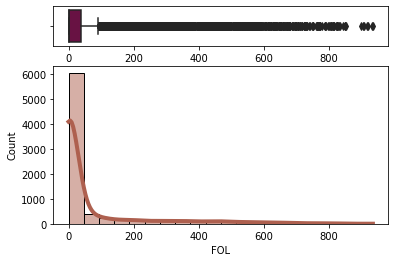

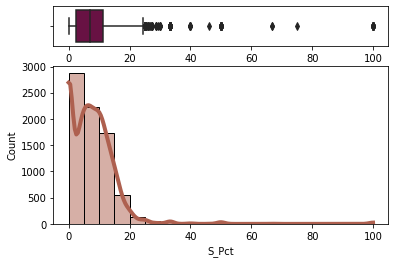

In [72]:
for i in X.select_dtypes(include="number").columns:
    fig,(ax1,ax2) = plt.subplots(2, gridspec_kw={"height_ratios": (.2, .8)})
    sns.boxplot(x=i,data=X, color="#760445", ax=ax1)
    sns.histplot(x=i,data=X, kde=True, color="#AE604F", line_kws={"lw":4}, bins=20, ax=ax2)
    plt.show()

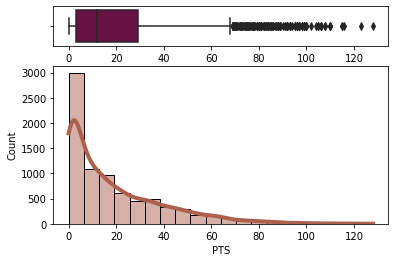

In [73]:
fig,(ax1,ax2) = plt.subplots(2, gridspec_kw={"height_ratios": (.2, .8)})
sns.boxplot(x="PTS",data=y.to_frame(), color="#760445", ax=ax1)
sns.histplot(x="PTS",data=y.to_frame(), kde=True, color="#AE604F", line_kws={"lw":4}, bins=20, ax=ax2)
plt.show()

# -----------------------------------------------

In [74]:
xTrain, xTest, yTrain, yTest = train_test_split(X,y)

In [75]:
numerical_features = X.select_dtypes(include="number").columns
numerical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())])
categorical_features = X.select_dtypes(include=["object","category"]).columns
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="Unknown")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))])
preprocessor = ColumnTransformer(transformers=[
    ("num",numerical_transformer,numerical_features),
    ("cat",categorical_transformer, categorical_features)])
# reg = Pipeline(steps=[
#     ("preprocessor",preprocessor),
#     ("regressor",GradientBoostingRegressor())
# ])
# reg.fit(xTrain,yTrain)

results_table = pd.DataFrame(columns=["model","acc_train","acc_test","mae","mse","rmse"])

In [76]:
def results(model):
    global seenData, unseenData, predictedData, dataMerged, x, results_table
    x = Pipeline(steps=[
    ("preprocessor",preprocessor),
    ("regressor",model)])
    x.fit(xTrain,yTrain)
    print("TESTING DATASET RESULTS\n")
    print("R2 is: {}".format(r2_score(yTest,x.predict(xTest))))
    print("Mean absolute error is: {}".format(mean_absolute_error(yTest,x.predict(xTest))))
    print("Mean squared error is: {}".format(mean_squared_error(yTest,x.predict(xTest))))
    print("Root mean squared error is: {}".format(sqrt(mean_squared_error(yTest,x.predict(xTest)))))
    results_table.loc[len(results_table)] = [len(results_table)+1,x.score(xTrain,yTrain),x.score(xTest,yTest),mean_absolute_error(yTest,x.predict(xTest)),mean_squared_error(yTest,x.predict(xTest)),sqrt(mean_squared_error(yTest,x.predict(xTest)))]
    seenData = pd.DataFrame({"Actual":yTrain,"Predicted":x.predict(xTrain),"Status":"Seen"})
    unseenData = pd.DataFrame({"Actual":yTest,"Predicted":x.predict(xTest),"Status":"Unseen"})
    predictedData = pd.concat([seenData,unseenData])
    dataMerged = pd.merge(left=data1,right=predictedData,left_index=True,right_index=True,how="inner")

In [77]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
models = {1:"LinearRegression",2:"RandomForestRegressor",3:"DecisionTreeRegressor",4:"GradientBoostingRegressor",5:"XGBRegressor"}

In [78]:
results(GradientBoostingRegressor())

TESTING DATASET RESULTS

R2 is: 0.9772611909872361
Mean absolute error is: 2.0401996007969427
Mean squared error is: 9.142122986119796
Root mean squared error is: 3.023594381877271


In [79]:
x

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Season', 'Age', 'GP', 'PIM', 'PS', 'PlusMinus', 'S', 'TOI', 'BLK',
       'HIT', 'FOW', 'FOL', 'S_Pct'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='Unknown',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Team_ID', 'Pos'], dtype='object'))])),
                ('regressor', GradientBoostingRegressor())])

In [80]:
results(RandomForestRegressor())

TESTING DATASET RESULTS

R2 is: 0.9783963816043006
Mean absolute error is: 1.8561068702290076
Mean squared error is: 8.685720356234096
Root mean squared error is: 2.947154620347242


In [81]:
results(DecisionTreeRegressor())

TESTING DATASET RESULTS

R2 is: 0.9511421723453146
Mean absolute error is: 2.7455470737913488
Mean squared error is: 19.64325699745547
Root mean squared error is: 4.432071411592493


In [82]:
results(LinearRegression())

TESTING DATASET RESULTS

R2 is: 0.9649020355148954
Mean absolute error is: 2.681000248863359
Mean squared error is: 14.111113194414768
Root mean squared error is: 3.7564761671564972


In [83]:
results_table["model"].replace(models,inplace=True)
results_table.style.highlight_max(subset=["acc_test"],color="#874C62").highlight_min(subset=["mae","mse","rmse"],color="#874C62")

,model,acc_train,acc_test,mae,mse,rmse
0,LinearRegression,0.982833,0.977261,2.040200,9.142123,3.023594
1,RandomForestRegressor,0.996911,0.978396,1.856107,8.685720,2.947155
2,DecisionTreeRegressor,1.000000,0.951142,2.745547,19.643257,4.432071
3,GradientBoostingRegressor,0.964731,0.964902,2.681000,14.111113,3.756476


In [84]:
# Best results - Random Forest Regressor
results(RandomForestRegressor())

TESTING DATASET RESULTS

R2 is: 0.9777745748327734
Mean absolute error is: 1.8882748091603054
Mean squared error is: 8.935717353689567
Root mean squared error is: 2.9892670261603542


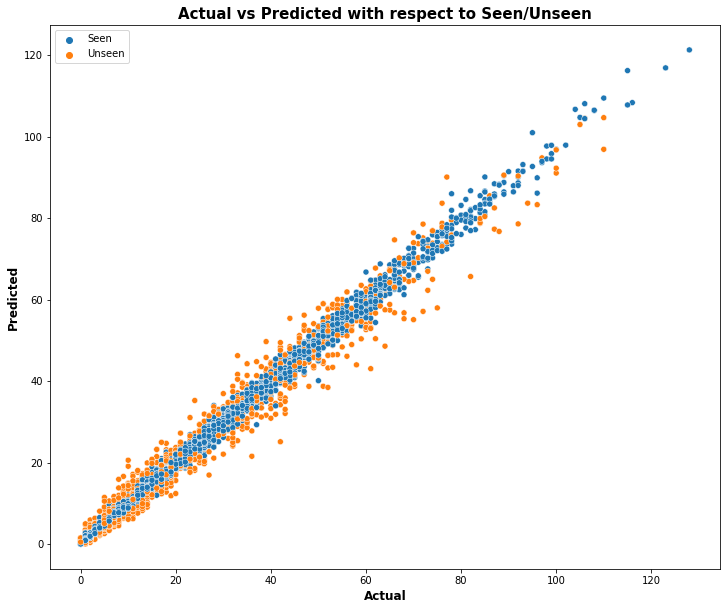

In [85]:
plt.figure(figsize=(12,10))
sns.scatterplot(x="Actual",y="Predicted",data=dataMerged,hue="Status")
plt.title("Actual vs Predicted with respect to Seen/Unseen", fontsize=15, fontweight="bold")
plt.xlabel("Actual",fontsize=12, fontweight="bold")
plt.ylabel("Predicted",fontsize=12, fontweight="bold")
plt.legend()
plt.show()

In [86]:
dataMerged.head()

,Season,Age,Team_ID,Pos,GP,G,A,PTS,PIM,PS,PlusMinus,esG,ppG,shG,GWG,esA,ppA,shA,S,TOI,BLK,HIT,FOW,FOL,S_Pct,Actual,Predicted,Status
0,2015,27,DET,LW,71.0,23,21,44,72.0,5.6,3.0,15.0,8.0,0.0,5.0,15.0,6.0,0.0,154.0,1272.0,28.0,153.0,7.0,8.0,14.935065,44,43.83,Seen
1,2015,27,EDM,C,3.0,0,0,0,5.0,-0.1,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,32.0,3.0,3.0,4.0,4.0,0.000000,0,0.00,Seen
2,2015,24,CBJ,C,3.0,0,0,0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,0.0,2.0,0.0,0.0,NaN,0,0.00,Unseen
3,2015,37,PIT,RW,70.0,1,6,7,44.0,-0.3,-1.0,1.0,0.0,0.0,1.0,5.0,0.0,1.0,51.0,682.0,29.0,183.0,17.0,23.0,1.960784,7,5.61,Unseen
4,2015,24,COL,LW,1.0,0,1,1,0.0,0.1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,10.0,0.0,1.0,0.0,2.0,0.000000,1,1.00,Seen
